In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### Problem statement -  Diabetes prediction

## Step 1 : Data Gathering

In [20]:
df = pd.read_csv('Diabetes.csv')
df.head(10)


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


##  Step 2:EDA - Read and explore the data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [22]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [23]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

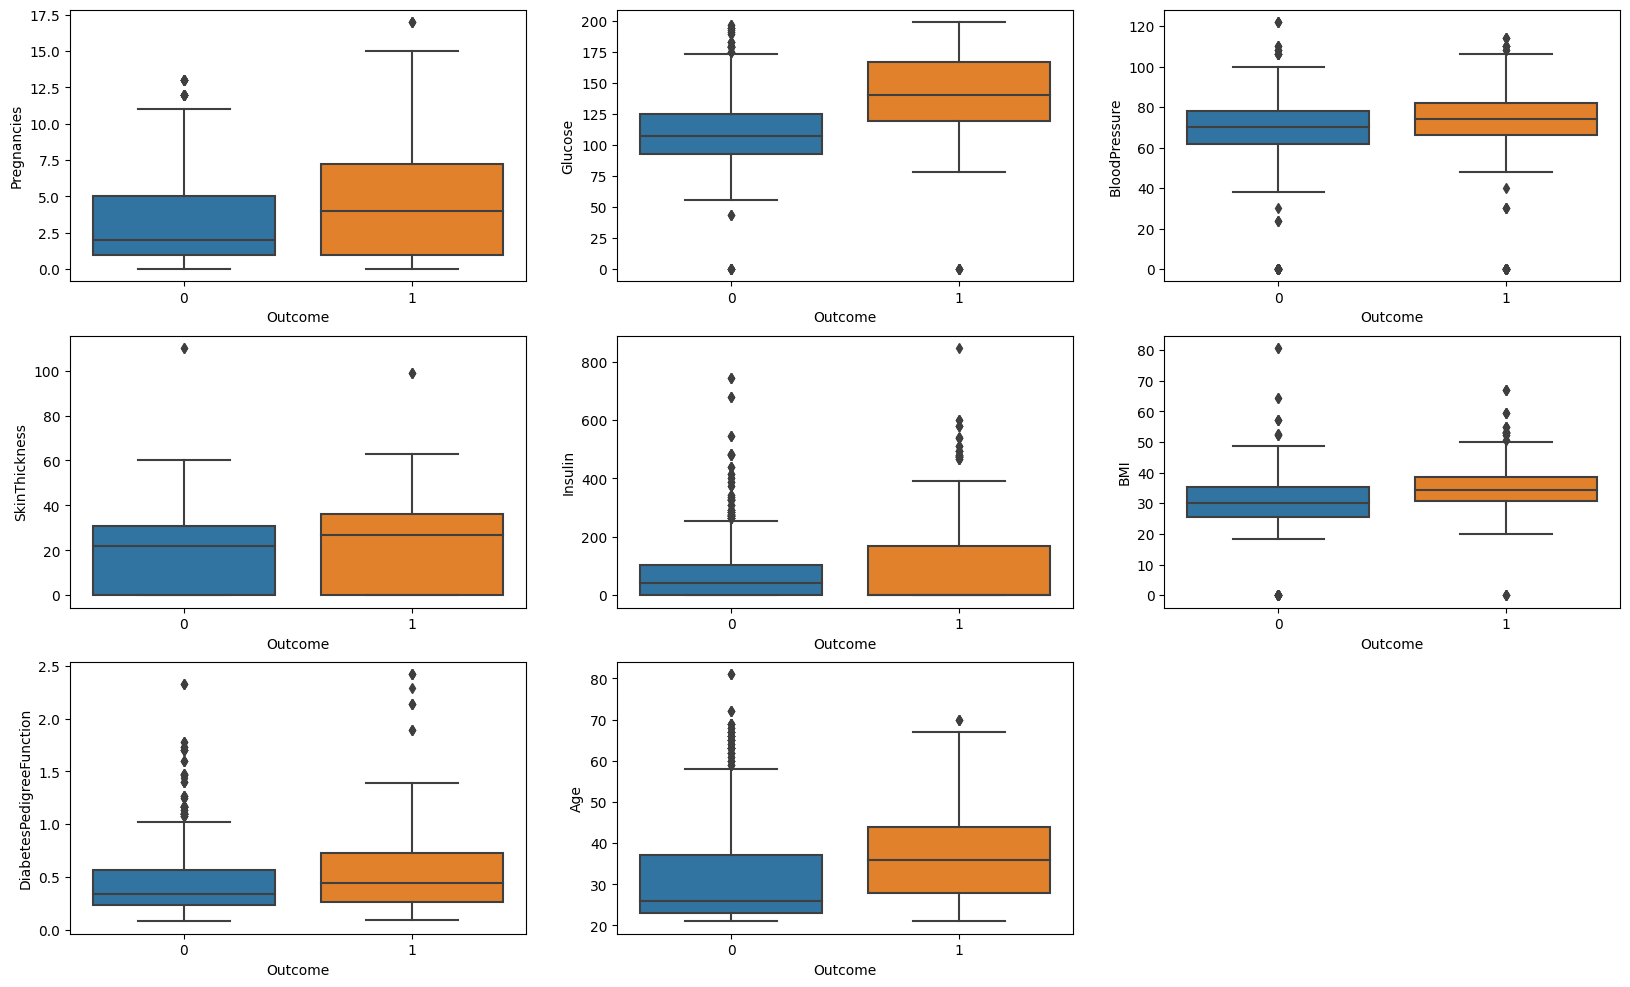

In [26]:
#Visualizing numerical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Outcome', y = 'BMI', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.show()

##  Step 3: Train Test split the data

In [7]:
def train_test_split_and_features(df):
    y = df["Outcome"]
    x = df.drop(['Outcome','Id'],axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features


In [8]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


##  Step 4: Fit and evaluate model

In [9]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test,max_depth=5,min_samples_split=0.01,max_features=0.8,max_samples=0.8):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=max_depth,\
                                            min_samples_split=min_samples_split,\
                                            max_features=max_features,
                                            max_samples=max_samples)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model


In [10]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[326  48]
 [ 36 144]]


Accuracy of Random Forest: 84.83754512635379 

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       374
           1       0.75      0.80      0.77       180

    accuracy                           0.85       554
   macro avg       0.83      0.84      0.83       554
weighted avg       0.85      0.85      0.85       554



##  Step 5: Try different parameters to identify best ones

In [11]:
param_grid = [
  {'max_depth': [3,5,7,10], 'min_samples_split': [0.01,0.03, 0.07, 0.1], 
'max_features': [0.7,0.8,0.9,1.0],
'max_samples': [0.7,0.8,0.9,1.0]}]

In [12]:
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.747 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.788 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.761 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.763 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.790 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.756 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.786 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.763 total time=   0.1s


[CV 1/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.747 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.781 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.758 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.783 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.792 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.754 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.783 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.763 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_sa

[CV 2/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.788 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.765 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.772 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.787 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.763 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.786 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.761 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.754 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.8, max_samples=1.0, min

[CV 3/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.761 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.747 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.787 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.743 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.779 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.763 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.777 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.785 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.9, max_samples=1.0, min_samp

[CV 4/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.758 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.790 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.756 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.792 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.758 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.763 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.792 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.07;, score=0.749 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=1.0, max_samples=0.9, min

[CV 5/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.801 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.758 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.797 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.770 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.786 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.787 total time=   0.1s
[CV 1/5] END max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.01;, score=0.815 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.01;, score=0.853 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.7, max_samples=0.9, min_samp

[CV 1/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.819 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.844 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.813 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.819 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.805 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.07;, score=0.772 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.07;, score=0.828 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.07;, score=0.788 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.8, max_samples=0.8, min

[CV 2/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.801 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.777 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.786 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.796 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.815 total time=   0.3s
[CV 2/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.865 total time=   0.3s
[CV 3/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.828 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.831 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_sam

[CV 3/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.810 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.810 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.808 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.777 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.819 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.795 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.797 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.803 total time=   0.2s
[CV 1/5] END max_depth=5, max_features=1.0, max_samples=0.7, min

[CV 4/5] END max_depth=5, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.799 total time=   0.3s
[CV 5/5] END max_depth=5, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.796 total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.844 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.912 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.849 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.878 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.857 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.810 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_s

[CV 5/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03;, score=0.848 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.790 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.853 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.792 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.817 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.805 total time=   0.2s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.756 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.815 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_s

[CV 1/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.862 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.916 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.865 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.889 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.889 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.840 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.887 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.835 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.8, max_samples=1.0, min

[CV 2/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.833 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.797 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.822 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.801 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.770 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.813 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.786 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.788 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_sam

[CV 3/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.865 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.889 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.887 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.837 total time=   0.3s
[CV 2/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.889 total time=   0.3s
[CV 3/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.840 total time=   0.3s
[CV 4/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.851 total time=   0.3s
[CV 5/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.851 total time=   0.3s
[CV 1/5] END max_depth=7, max_features=1.0, max_samples=0.9, min

[CV 3/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.797 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.806 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.814 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.754 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.815 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.770 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.792 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.796 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=0.7, max_samples=0.9,

[CV 3/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.01;, score=0.887 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.01;, score=0.932 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.01;, score=0.907 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.844 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.889 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.828 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.869 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.848 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=0.8, max_samples

[CV 3/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.07;, score=0.792 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.07;, score=0.804 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.07;, score=0.803 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.756 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.790 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.770 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.786 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.799 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=0.9, max_samples=0.8,

[CV 3/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01;, score=0.903 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01;, score=0.914 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01;, score=0.907 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.824 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.896 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.828 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.865 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.846 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=1.0, max_samples

[CV 3/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.07;, score=0.797 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.07;, score=0.822 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.07;, score=0.810 total time=   0.2s
[CV 1/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.770 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.822 total time=   0.2s
[CV 3/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.797 total time=   0.2s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.804 total time=   0.2s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.799 total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [13]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
220,0.388540,0.012573,0.012546,0.006142,10,0.8,1.0,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.909707,0.943567,0.934537,0.918736,0.918552,0.925020,0.012251,1
252,0.469717,0.005062,0.015624,0.000004,10,1.0,1.0,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.909707,0.945824,0.925508,0.925508,0.916290,0.924567,0.012190,2
236,0.424275,0.007032,0.012501,0.006250,10,0.9,1.0,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.911964,0.943567,0.920993,0.918736,0.923077,0.923667,0.010628,3
248,0.445943,0.006959,0.012501,0.006250,10,1.0,0.9,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.914221,0.932280,0.918736,0.918736,0.920814,0.920957,0.006057,4
232,0.460184,0.006979,0.012978,0.006550,10,0.9,0.9,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.916479,0.945824,0.905192,0.918736,0.918552,0.920956,0.013399,5
204,0.362457,0.018534,0.012373,0.004741,10,0.7,1.0,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.914221,0.941309,0.911964,0.920993,0.911765,0.920050,0.011143,6
216,0.376693,0.010126,0.013374,0.006895,10,0.8,0.9,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.907449,0.948081,0.902935,0.918736,0.920814,0.919603,0.015740,7
228,0.402468,0.007111,0.012203,0.006128,10,0.9,0.8,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.916479,0.945824,0.911964,0.911964,0.909502,0.919147,0.013528,8
200,0.360279,0.016140,0.010057,0.006915,10,0.7,0.9,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.907449,0.943567,0.907449,0.920993,0.909502,0.917792,0.013837,9
212,0.394928,0.021412,0.016134,0.000632,10,0.8,0.8,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.909707,0.943567,0.887133,0.932280,0.907240,0.915985,0.019873,10


In [14]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [15]:
search.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': 1.0,
 'min_samples_split': 0.01}

## Step 6: Evaluate the model with best parameters

In [16]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10,min_samples_split=0.01,\
                               max_features=0.7,max_samples= 1.0)

confussion matrix
[[360  14]
 [ 17 163]]


Accuracy of Random Forest: 94.40433212996389 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       374
           1       0.92      0.91      0.91       180

    accuracy                           0.94       554
   macro avg       0.94      0.93      0.94       554
weighted avg       0.94      0.94      0.94       554



In [17]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 8 artists>

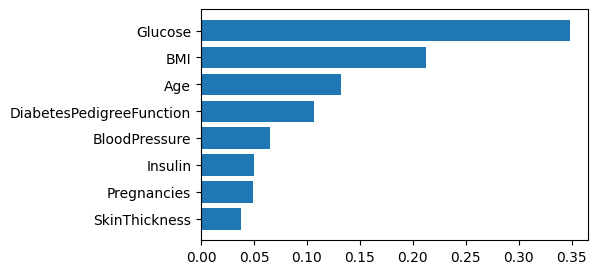

In [18]:
plt.figure(figsize=(5, 3))
plt.barh(importances.feature, importances.importance)